In [3]:
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


Filter out Arabic Countries

In [4]:
df_Arabic = df[((df['job_country'] == 'Egypt') |  (df['job_country'] == 'Saudi Arabia') | (df['job_country'] == 'Qatar') | (df['job_country'] == 'United Arab Emirates'))]


In [5]:
df_skills = df_Arabic.explode('job_skills')
df_skills_Ar = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_Ar = df_skills_Ar.reset_index(name='skill_count')
df_skills_Ar.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_Ar

,job_skills,job_title_short,skill_count
1079,sql,Data Analyst,1668
295,excel,Data Analyst,1337
839,python,Data Scientist,1233
1080,sql,Data Engineer,1125
837,python,Data Analyst,990
...,...,...,...
410,golang,Data Analyst,1
1125,swift,Senior Data Engineer,1
1126,swift,Senior Data Scientist,1
1128,symfony,Software Engineer,1


In [6]:
job_titles = df_skills_Ar['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

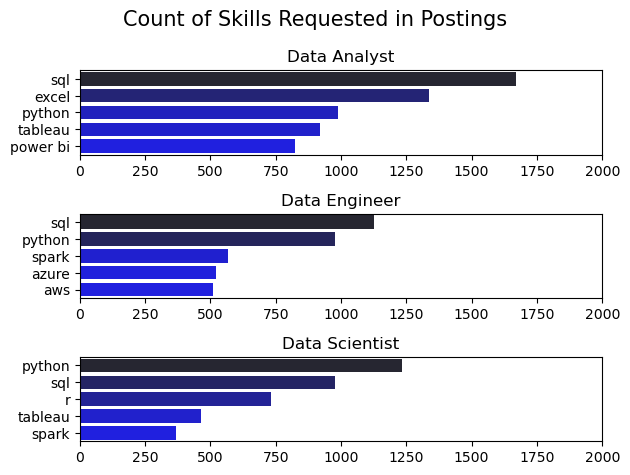

In [7]:
fig,ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_Ar[df_skills_Ar['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot,x='skill_count',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 2000)

    fig.tight_layout() 
    fig.suptitle('Count of Skills Requested in Postings',fontsize = 15)

    

plt.show()

In [8]:
df_job_count = df_Arabic['job_title_short'].value_counts().reset_index(name='jobs_total')


In [9]:
df_skills_perc_ar = pd.merge(df_skills_Ar,df_job_count,on='job_title_short',how='left')
df_skills_perc_ar['skills_perc'] = (df_skills_perc_ar['skill_count']/df_skills_perc_ar['jobs_total']) * 100
df_skills_perc_ar

,job_skills,job_title_short,skill_count,jobs_total,skills_perc
0,sql,Data Analyst,1668,4454,37.449484
1,excel,Data Analyst,1337,4454,30.017961
2,python,Data Scientist,1233,2807,43.925900
3,sql,Data Engineer,1125,2337,48.138639
4,python,Data Analyst,990,4454,22.227211
...,...,...,...,...,...
1303,golang,Data Analyst,1,4454,0.022452
1304,swift,Senior Data Engineer,1,627,0.159490
1305,swift,Senior Data Scientist,1,590,0.169492
1306,symfony,Software Engineer,1,1196,0.083612


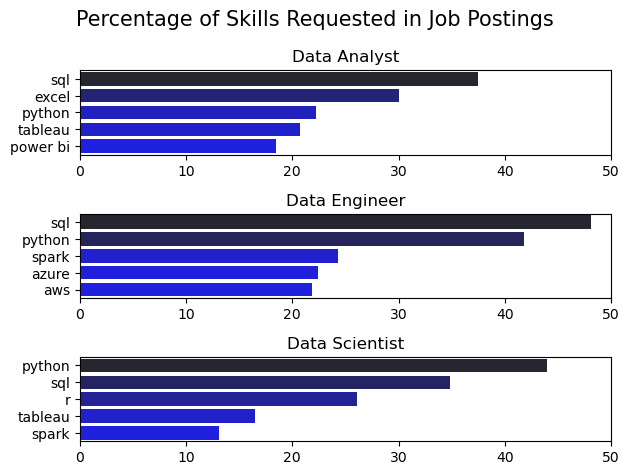

In [20]:
fig,ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_perc_ar[df_skills_perc_ar['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot,x='skills_perc',y='job_skills',ax=ax[i],hue='skills_perc',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,50)
    exit

 
 
 
 
if i != len(job_titles) - 1:
 ax[i].set_xticks([])

 
        
        
fig.suptitle('Percentage of Skills Requested in Job Postings',fontsize = 15)
fig.tight_layout()

    

plt.show()